In [1]:
import pandas as pd
import numpy  as np

from scipy.stats import  mannwhitneyu

import matplotlib.pyplot as plt 
from matplotlib import ticker
from matplotlib.gridspec import GridSpec


from pathlib import Path

import time

import pickle

import sys
sys.path.append("D:/analyze_Pearson_residuals")

from  nru_DE import DE_H_stats
from  plot_tab_utilities import *


pd.set_option('display.max_columns', 5)

In [2]:
#### user specified
data_folder = r"D:/analyze_Pearson_residuals/"

data_subfolder = "33k_PBMC"

data_path = Path ( data_folder + data_subfolder )

In [3]:
# output plot
plot_jpg =  data_subfolder + "_Figure_7.jpg"

# output data
DE_stats_pkl = "DE_stats_SCT.pkl"


# input data - to calculate DE for SCTransform residuals
Pearson_residuals_pkl = "SCT_v2_Pearson_residuals_top_2000.pkl"   # Seurat output
clusters_pkl = "clusters.pkl"

# input data - Poisson model
DE_stats_Poisson_pkl = "DE_stats.pkl"
nru_dict_pkl =  "nru_dict.pkl"

# input data - SCTransform residual variance
S_g_pkl = "SCT_v2_residual_variance.pkl"

# input data - gene symbol notation
genes_tsv  = "genes.tsv"


# path: output plot
plot_dsn = data_path / plot_jpg

# path: output data
DE_stats_dsn = data_path / DE_stats_pkl


# paths: input data
Pearson_residuals__dsn = data_path / Pearson_residuals_pkl
clusters_dsn = data_path / clusters_pkl
DE_stats_Poisson_dsn = data_path / DE_stats_Poisson_pkl
nru_dict_dsn = data_path / nru_dict_pkl
S_g_dsn = data_path / S_g_pkl

genes_dsn = data_path / genes_tsv

In [4]:
def list_top_n_H_stats ( df_plot, stat,  rank, n_top ):  
  df_plot_top = df_plot.loc [ df_plot[rank]<= n_top ] 
  h_values_top_list = df_plot_top[stat].values.tolist()    
  return  h_values_top_list	    	
			
pctl_list = [.01,.05, .10, .25, .5, .75, .90, .95, .99 ]

In [5]:
list_annotation_genes = ['MALAT1']

df_gene_symbols = pd.read_csv ( genes_dsn, sep='\t', names = ['ENSEMBL_ID','gene_symbol_mixeedcase'], usecols =[0,1] ) .set_index ( ['ENSEMBL_ID'] ) 
df_gene_symbols['gene_symbol'] = df_gene_symbols['gene_symbol_mixeedcase'].str.upper()
print (  '\n\n df_gene_symbols' )   
print ( df_gene_symbols ) 



 df_gene_symbols
                gene_symbol_mixeedcase   gene_symbol
ENSEMBL_ID                                          
ENSG00000243485             MIR1302-10    MIR1302-10
ENSG00000237613                FAM138A       FAM138A
ENSG00000186092                  OR4F5         OR4F5
ENSG00000238009           RP11-34P13.7  RP11-34P13.7
ENSG00000239945           RP11-34P13.8  RP11-34P13.8
...                                ...           ...
ENSG00000215635             AC145205.1    AC145205.1
ENSG00000268590                  BAGE5         BAGE5
ENSG00000251180             CU459201.1    CU459201.1
ENSG00000215616             AC002321.2    AC002321.2
ENSG00000215611             AC002321.1    AC002321.1

[32738 rows x 2 columns]


In [6]:
df_clusters = pd.read_pickle ( clusters_dsn )	
print ( '\n\n df_clusters'  )
print ( df_clusters  )

print ( '\n\n df_clusters.value_counts' )
print ( df_clusters['Cluster'].value_counts() )


df_residuals = pd.read_pickle ( Pearson_residuals__dsn )
print ( '\n\n df_residuals'  )
print ( df_residuals  )



 df_clusters
                  Cluster
Barcode                  
AAACATTGACGACT-1        1
AAACATTGACGGGA-1        8
AAACATTGCCGCTT-1        2
AAACATTGCTCATT-1        3
AAACCGTGCCCTCA-1        5
...                   ...
TTTGCATGCACTAG-6        3
TTTGCATGCCGAAT-6        1
TTTGCATGGAGGTG-6        7
TTTGCATGGATAAG-6        3
TTTGCATGGGCATT-6        4

[33148 rows x 1 columns]


 df_clusters.value_counts
1     7406
4     7047
2     6307
5     4164
3     3660
7     2288
8     1959
6      135
10     107
9       75
Name: Cluster, dtype: int64


 df_residuals
                 AAACATTGACGACT-1  AAACATTGACGGGA-1  ...  TTTGCATGGATAAG-6  \
ENSG00000254709         -0.563211         -0.517833  ...         -0.543840   
ENSG00000163736         -0.280441         -0.231268  ...         -0.267137   
ENSG00000087086         -3.662867         -2.495126  ...         -2.379031   
ENSG00000163220         -3.091746         -3.001064  ...         -3.054856   
ENSG00000090382         -3.367624         -3.7425

In [7]:
start_time = time.time()
df_DE_stats_SCT = DE_H_stats ( df_residuals, df_clusters ).rename ( columns={'H_stat':'SCT_H_stat'} )
end_time = time.time()
elapsed = end_time - start_time
print ( 'function DE_H_stats time: ',  f"{ elapsed:.1f}", ' seconds'  )

print ( '\n df_DE_stats_SCT' )
print ( df_DE_stats_SCT  )
print ( '\n\n df_DE_stats_SCT.describe' )
print ( df_DE_stats_SCT.describe ( percentiles=pctl_list ) )

function DE_H_stats time:  18.2  seconds

 df_DE_stats_SCT
                   SCT_H_stat  p_value
gene                                  
ENSG00000254709   7338.749967      0.0
ENSG00000163736   6271.996666      0.0
ENSG00000087086  19627.556816      0.0
ENSG00000163220  17187.563684      0.0
ENSG00000090382  19296.644909      0.0
...                       ...      ...
ENSG00000137841   4930.152304      0.0
ENSG00000179051   5686.952032      0.0
ENSG00000248810   4479.497762      0.0
ENSG00000078237   5814.178474      0.0
ENSG00000107736   4571.230516      0.0

[2000 rows x 2 columns]


 df_DE_stats_SCT.describe
         SCT_H_stat        p_value
count   2000.000000   2.000000e+03
mean    5222.469180   2.190837e-98
std     2833.471428   9.797720e-97
min      467.843764   0.000000e+00
1%       901.423430   0.000000e+00
5%      1763.397686   0.000000e+00
10%     2442.400582   0.000000e+00
25%     3635.663262   0.000000e+00
50%     5056.416148   0.000000e+00
75%     6027.206624   0.000000e

In [8]:
f = open( nru_dict_dsn, 'rb' )    
nru_dict = pickle.load(f)           
f.close()       

df_A_g = nru_dict['df_gene_stats'] [['A_g']]

df_S_g = pd.read_pickle ( S_g_dsn ).rename( columns={'residual_variance':'S_g'} )

df_gene_stats = pd.concat ( [ df_A_g, df_S_g ], axis=1 ) 
df_gene_stats = df_gene_stats.merge ( df_gene_symbols[['gene_symbol']], how='left', left_index=True, right_index=True )
print ( '\n df_gene_stats' )
print ( df_gene_stats  )


 df_gene_stats
                        A_g        S_g    gene_symbol
ENSG00000254709  321.476696  55.030621          IGLL5
ENSG00000163736   78.464313  96.260369           PPBP
ENSG00000087086   42.226038  36.795248            FTL
ENSG00000163220   34.965024  79.028298         S100A9
ENSG00000090382   34.258216  66.168486            LYZ
...                     ...        ...            ...
ENSG00000171241    0.599725   0.039641         SHCBP1
ENSG00000149573    0.599725   0.052637          MPZL2
ENSG00000122025    0.599725   0.135192           FLT3
ENSG00000237980    0.599725   0.040471  RP11-338C15.3
ENSG00000158488    0.599725   0.081889           CD1E

[12324 rows x 3 columns]


In [9]:
df_DE_stats_Poisson = pd.read_pickle ( DE_stats_Poisson_dsn )[['H_stat']].rename ( columns={'H_stat':'Poisson_H_stat'} )
df_DE_stats_compare_methods = pd.concat ( [ df_DE_stats_Poisson, df_DE_stats_SCT[['SCT_H_stat']] ], axis=1 )
print ( '\n df_DE_stats_compare_methods' )
print ( df_DE_stats_compare_methods  )
print ( '\n\n df_DE_stats_compare_methods.describe' )
print ( df_DE_stats_compare_methods.describe ( percentiles=pctl_list ) )


 df_DE_stats_compare_methods
                 Poisson_H_stat   SCT_H_stat
gene                                        
ENSG00000188290     3720.977633  3721.236197
ENSG00000187608     4386.485905  4557.298995
ENSG00000186891     6657.565638  6657.426291
ENSG00000186827     5760.829303  5760.977394
ENSG00000242485     1229.230979  1234.736413
...                         ...          ...
ENSG00000137841             NaN  4930.152304
ENSG00000179051             NaN  5686.952032
ENSG00000248810             NaN  4479.497762
ENSG00000078237             NaN  5814.178474
ENSG00000107736             NaN  4571.230516

[2867 rows x 2 columns]


 df_DE_stats_compare_methods.describe
       Poisson_H_stat    SCT_H_stat
count     2000.000000   2000.000000
mean      5306.776149   5222.469180
std       3306.813950   2833.471428
min        130.034890    467.843764
1%         454.933253    901.423430
5%        1037.704128   1763.397686
10%       1551.585011   2442.400582
25%       2861.710099   3635.663

In [10]:
df_analy_stats =  df_gene_stats.merge ( df_DE_stats_compare_methods, how='inner', left_index=True, right_index=True ) 
print ( '\n df_analy_stats' )
print ( df_analy_stats  )
print ( '\n\n df_analy_stats.describe' )
print ( df_analy_stats.describe ( percentiles=pctl_list ) )


 df_analy_stats
                        A_g        S_g    gene_symbol  Poisson_H_stat  \
ENSG00000254709  321.476696  55.030621          IGLL5     7433.485751   
ENSG00000163736   78.464313  96.260369           PPBP     6273.270950   
ENSG00000087086   42.226038  36.795248            FTL    19599.030122   
ENSG00000163220   34.965024  79.028298         S100A9    14721.030914   
ENSG00000090382   34.258216  66.168486            LYZ    18283.913752   
...                     ...        ...            ...             ...   
ENSG00000137841    0.908716   1.554705          PLCB2             NaN   
ENSG00000179051    0.892045   1.242722           RCC2             NaN   
ENSG00000248810    0.890261   1.611782  RP11-362F19.1             NaN   
ENSG00000078237    0.883876   1.578404        C12ORF5             NaN   
ENSG00000107736    0.822376   1.338470          CDH23             NaN   

                   SCT_H_stat  
ENSG00000254709   7338.749967  
ENSG00000163736   6271.996666  
ENSG000000

In [11]:
df_plot_both =  df_analy_stats.dropna() 
print ( '\n df_plot_both' )
print ( df_plot_both  )
print ( '\n\n df_plot_both.describe' )
print ( df_plot_both.describe ( percentiles=pctl_list ) )
print (  '\n\n df_plot_both.corr:' )
print (  df_plot_both.corr(method='spearman') )


 df_plot_both
                        A_g        S_g gene_symbol  Poisson_H_stat  \
ENSG00000254709  321.476696  55.030621       IGLL5     7433.485751   
ENSG00000163736   78.464313  96.260369        PPBP     6273.270950   
ENSG00000087086   42.226038  36.795248         FTL    19599.030122   
ENSG00000163220   34.965024  79.028298      S100A9    14721.030914   
ENSG00000090382   34.258216  66.168486         LYZ    18283.913752   
...                     ...        ...         ...             ...   
ENSG00000184898    1.127677   1.257284       RBM43     6708.059000   
ENSG00000138185    1.127410   1.218950      ENTPD1     5292.560675   
ENSG00000126749    1.127372   1.805426        EMG1     4182.221987   
ENSG00000158201    1.127089   1.747845       ABHD3     4208.796372   
ENSG00000013810    1.126891   1.346578       TACC3     5099.123948   

                   SCT_H_stat  
ENSG00000254709   7338.749967  
ENSG00000163736   6271.996666  
ENSG00000087086  19627.556816  
ENSG00000163220 

In [12]:
df_plot_SCT = df_analy_stats[[  'SCT_H_stat', 'S_g', 'gene_symbol' ]].dropna() 
df_plot_SCT = df_plot_SCT.assign( rank_S_g = df_plot_SCT['S_g'].rank ( ascending=False ).values,
                      rank_SCT_H_stat = df_plot_SCT['SCT_H_stat'].rank ( ascending=False ).values )
print ( '\n df_plot_SCT' )
print ( df_plot_SCT  )


 df_plot_SCT
                   SCT_H_stat        S_g    gene_symbol  rank_S_g  \
ENSG00000254709   7338.749967  55.030621          IGLL5       6.0   
ENSG00000163736   6271.996666  96.260369           PPBP       1.0   
ENSG00000087086  19627.556816  36.795248            FTL       8.0   
ENSG00000163220  17187.563684  79.028298         S100A9       3.0   
ENSG00000090382  19296.644909  66.168486            LYZ       4.0   
...                       ...        ...            ...       ...   
ENSG00000137841   4930.152304   1.554705          PLCB2     538.0   
ENSG00000179051   5686.952032   1.242722           RCC2    1749.0   
ENSG00000248810   4479.497762   1.611782  RP11-362F19.1     440.0   
ENSG00000078237   5814.178474   1.578404        C12ORF5     495.0   
ENSG00000107736   4571.230516   1.338470          CDH23    1175.0   

                 rank_SCT_H_stat  
ENSG00000254709            180.0  
ENSG00000163736            376.0  
ENSG00000087086             10.0  
ENSG00000163220  

In [13]:
df_plot_Poisson = df_analy_stats[[ 'Poisson_H_stat', 'A_g', 'gene_symbol' ]].dropna()   
df_plot_Poisson = df_plot_Poisson.assign( rank_A_g = df_plot_Poisson['A_g'].rank ( ascending=False ).values,
                      rank_Poisson_H_stat = df_plot_Poisson['Poisson_H_stat'].rank ( ascending=False ).values )
print ( '\n df_plot_Poisson' )
print ( df_plot_Poisson  )


 df_plot_Poisson
                 Poisson_H_stat         A_g gene_symbol  rank_A_g  \
ENSG00000254709     7433.485751  321.476696       IGLL5       1.0   
ENSG00000163736     6273.270950   78.464313        PPBP       2.0   
ENSG00000087086    19599.030122   42.226038         FTL       3.0   
ENSG00000163220    14721.030914   34.965024      S100A9       4.0   
ENSG00000090382    18283.913752   34.258216         LYZ       5.0   
...                         ...         ...         ...       ...   
ENSG00000128656     6963.217028    1.127051        CHN1    1996.0   
ENSG00000124762     4202.745003    1.126991      CDKN1A    1997.0   
ENSG00000174021     2252.778312    1.126892        GNG5    1998.0   
ENSG00000013810     5099.123948    1.126891       TACC3    1999.0   
ENSG00000179523     6465.110464    1.126890   EIF3J-AS1    2000.0   

                 rank_Poisson_H_stat  
ENSG00000254709                234.0  
ENSG00000163736                750.0  
ENSG00000087086                  9.0

In [14]:
df_SCT_quartiles_list = []
df_Poisson_quartlies_list = []

boxplot_DE_list = []
label_list = []

for group in range(10):
  n_top = 100 * ( 1 + group )

  h_values_SCT_top_list = list_top_n_H_stats ( df_plot_SCT, 'SCT_H_stat', 'rank_S_g', n_top )
  boxplot_DE_list.append ( h_values_SCT_top_list )
  df_SCT_H_stats = pd.DataFrame ( data = h_values_SCT_top_list, columns=[n_top] )
  df_quartiles = df_SCT_H_stats.describe ( percentiles=[.25,.5,.75] )
  df_SCT_quartiles_list.append ( df_quartiles )
  
  h_values_nru_top_list = list_top_n_H_stats ( df_plot_Poisson, 'Poisson_H_stat', 'rank_A_g', n_top )
  boxplot_DE_list.append ( h_values_nru_top_list )
  df_Poisson_H_stats = pd.DataFrame ( data = h_values_nru_top_list, columns=[n_top] )
  df_quartiles = df_Poisson_H_stats.describe ( percentiles=[.25,.5,.75] )
  df_Poisson_quartlies_list.append ( df_quartiles )
  
  label_list.extend (  [ str(n_top) + ' \n ' + '$S_g$',   str(n_top) + ' \n ' + '$A_g$', ] )

In [15]:
df_SCT_quartiles = pd.concat ( df_SCT_quartiles_list, axis=1, sort=False )
print ( '\n df_SCT_quartiles' )
print ( df_SCT_quartiles  )


 df_SCT_quartiles
               100           200   ...          900           1000
count    100.000000    200.000000  ...    900.000000   1000.000000
mean   11079.592440   9395.840237  ...   6164.195577   6018.555182
std     5364.788170   4948.282491  ...   3522.941057   3425.248881
min     2616.692019   1111.233031  ...    847.582257    827.278559
25%     6735.631263   6139.718329  ...   4283.012190   4207.869780
50%     9873.693031   7652.469692  ...   5513.085702   5426.084720
75%    15152.922271  12067.836847  ...   6538.881530   6428.683835
max    23184.044199  23184.044199  ...  23184.044199  23184.044199

[8 rows x 10 columns]


In [16]:
df_Poisson_quartiles = pd.concat ( df_Poisson_quartlies_list, axis=1, sort=False )
print ( '\n df_Poisson_quartiles' )
print ( df_Poisson_quartiles  )


 df_Poisson_quartiles
               100           200   ...          900           1000
count    100.000000    200.000000  ...    900.000000   1000.000000
mean   12167.970223  10756.029591  ...   6447.504845   6218.971867
std     5427.996683   5204.535712  ...   4050.052697   3959.679620
min     1119.585461    525.304635  ...    179.043659    179.043659
25%     7036.666692   6909.850587  ...   3566.511422   3408.792891
50%    11765.954105  10214.574845  ...   6242.216210   6034.513408
75%    17504.850991  14982.727322  ...   7462.901058   7317.762231
max    22236.157542  22236.157542  ...  22236.157542  22236.157542

[8 rows x 10 columns]


In [17]:
# compare distributions of H-statistics for genes with highest scores

tuple_list_greater = []

for group in range(10):
  n = 100 * ( 1 + group ) 
  n_SCT = 2 * group
  n_Poisson = 1 + n_SCT
  list_SCT = boxplot_DE_list[ n_SCT ]
  list_Poisson = boxplot_DE_list [ n_Poisson ]

  MW_stat, MW_pv = mannwhitneyu( list_Poisson, list_SCT, alternative='greater' )     
  tuple_list_greater.append ( ( n , MW_stat, MW_pv ) )  

df_DE_stats_greater = pd.DataFrame ( data = tuple_list_greater, columns= ['genes', 'MW_stat', 'MW_pv'] ).set_index ( ['genes'] )
print ( '\n df_DE_stats_greater' )
print ( df_DE_stats_greater  )


 df_DE_stats_greater
        MW_stat         MW_pv
genes                        
100      5634.0  6.082477e-02
200     23632.0  8.417239e-04
300     54913.0  1.514023e-06
400     97494.0  4.327209e-08
500    148982.0  7.544984e-08
600    206838.0  3.891750e-06
700    273794.0  7.036852e-05
800    352413.0  2.260331e-04
900    437548.0  1.578874e-03
1000   530278.0  9.521224e-03


In [18]:
# for genes with highest scores for each method, compute Speraman correlation of scores with H-statistics

corr_tuple_list = []

top_rank_list = [50, 100, 200, 500, 1000, 2000]

for top_rank in top_rank_list:
  df_SCT_top_rank = df_plot_SCT.loc [ df_plot_SCT['rank_SCT_H_stat'] <= top_rank ].sort_values ( ['rank_SCT_H_stat'] )
  df_corr = df_SCT_top_rank[['SCT_H_stat', 'S_g']].corr ( method='spearman' )
  SCT_corr = df_corr.at['SCT_H_stat','S_g']
 
  df_Poisson_top_rank = df_plot_Poisson.loc [ df_plot_Poisson['rank_Poisson_H_stat'] <= top_rank ].sort_values ( ['rank_Poisson_H_stat'] )
  df_corr = df_Poisson_top_rank[[ 'Poisson_H_stat', 'A_g']].corr ( method='spearman' )
  Poisson_corr = df_corr.at['Poisson_H_stat', 'A_g'] 
  
  corr_tuple_list.append ( ( top_rank, SCT_corr, Poisson_corr ) ) 
  
  
df_corr_compare = pd.DataFrame ( data = corr_tuple_list, columns=[ 'genes', 'S_g', 'A_g' ] ).set_index ( ['genes'] )
print ( '\n Table 8 \n Spearman correlations of H-statistics with S_g and A_g \n for genes with the largest 50, 100, 200, 500, 1,000, and 2,000 H-statistics \n' )
print ( df_corr_compare  )


 Table 8 
 Spearman correlations of H-statistics with S_g and A_g 
 for genes with the largest 50, 100, 200, 500, 1,000, and 2,000 H-statistics 

            S_g       A_g
genes                    
50     0.570996  0.627563
100    0.165485  0.395464
200    0.377288  0.714003
500    0.506967  0.733073
1000   0.390167  0.506315
2000   0.338265  0.323066


C:\Users\vfkle\AppData\Local\Temp\ipykernel_20244\22902118.py:121: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust( left=0.07, right=0.98, bottom=0.1,  top=0.95, wspace=0.25, hspace=0.3 )


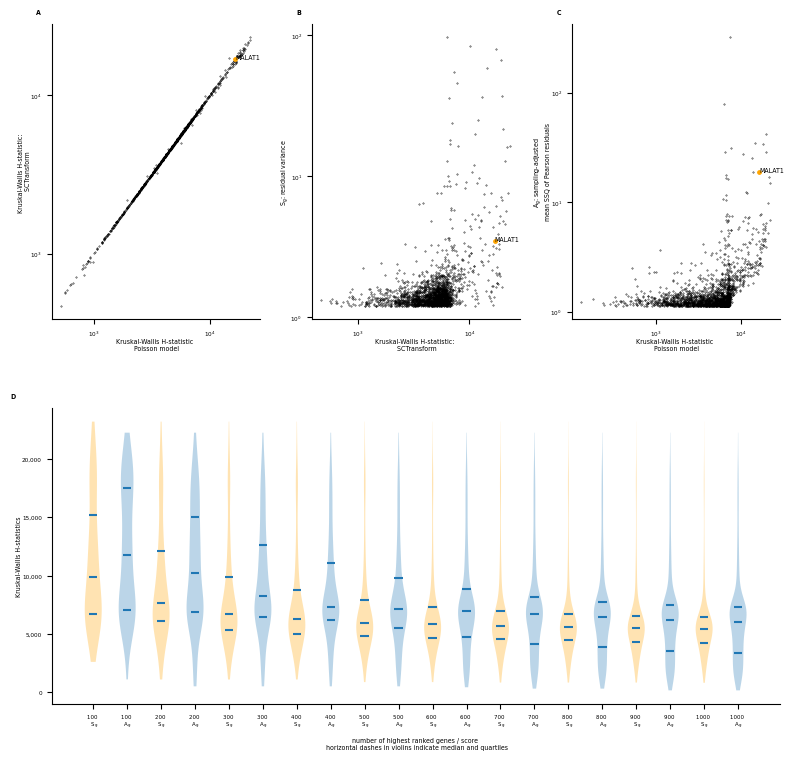

In [19]:
fig = plt.figure(constrained_layout=True, figsize=( 8, 8 ) )

gs = GridSpec( 2, 3  )

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, :])

######

ax1.scatter ( df_plot_both[ 'Poisson_H_stat' ],df_plot_both['SCT_H_stat'], marker='o', color='k',  s=0.1)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel ( 'Kruskal-Wallis H-statistic \n Poisson model', fontsize=4.5, labelpad=-0.20 )	  
ax1.set_ylabel ( 'Kruskal-Wallis H-statistic: \n SCTransform',fontsize=4.5, labelpad=-0.20 )
ax1.tick_params(labelsize=4.1, which='major' )    
ax1.minorticks_off()
	
right = ax1.spines["right"]	
right.set_visible(False)
top = ax1.spines["top"]	
top.set_visible(False)

ax1.text(-0.05, 1.05, 'A', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax1.transAxes,)

df_annotation_gene_plot_data = df_plot_both.loc [ df_plot_both ['gene_symbol'].isin ( list_annotation_genes) ]
for index, row in df_annotation_gene_plot_data.iterrows():
  x = row[ 'Poisson_H_stat' ]
  y = row[ 'SCT_H_stat' ]
  txt = row['gene_symbol'] 
  ax1.scatter ( x,y, c='orange', s=6 )
  ax1.annotate( txt, ( x, y ), fontsize=4.5 )



ax2.scatter ( df_plot_SCT[ 'SCT_H_stat' ],df_plot_SCT['S_g'], marker='o', color='k',  s=0.1)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel ( 'Kruskal-Wallis H-statistic: \n SCTransform',fontsize=4.5, labelpad=-0.20 )	
ax2.set_ylabel ( '$S_g$: residual variance', fontsize=4.5, labelpad=-0.20 )	  
ax2.tick_params(labelsize=4.1, which='major' )    
ax2.minorticks_off()
	
right = ax2.spines["right"]	
right.set_visible(False)
top = ax2.spines["top"]	
top.set_visible(False)

ax2.text(-0.05, 1.05, 'B', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax2.transAxes,)

df_annotation_gene_plot_data = df_plot_SCT.loc [ df_plot_SCT ['gene_symbol'].isin ( list_annotation_genes) ]
for index, row in df_annotation_gene_plot_data.iterrows():
  x = row[ 'SCT_H_stat' ]
  y = row[ 'S_g' ]
  txt = row['gene_symbol'] 
  ax2.scatter ( x,y, c='orange', s=6 )
  ax2.annotate( txt, ( x, y ), fontsize=4.5 )



ax3.scatter ( df_plot_Poisson[ 'Poisson_H_stat' ],df_plot_Poisson['A_g'] , marker='o', color='k',  s=0.1)

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel ( 'Kruskal-Wallis H-statistic \n Poisson model',fontsize=4.5, labelpad=-0.20 )	
ax3.set_ylabel ( '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals', fontsize=4.5, labelpad=-0.20 )	  
ax3.tick_params(labelsize=4.1, which='major' )    
ax3.minorticks_off()
	
right = ax3.spines["right"]	
right.set_visible(False)
top = ax3.spines["top"]	
top.set_visible(False)

ax3.text(-0.05, 1.05, 'C', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax3.transAxes,)

df_annotation_gene_plot_data = df_plot_Poisson.loc [ df_plot_Poisson ['gene_symbol'].isin ( list_annotation_genes) ]
for index, row in df_annotation_gene_plot_data.iterrows():
  x = row[ 'Poisson_H_stat' ]
  y = row[ 'A_g' ]
  txt = row['gene_symbol'] 
  ax3.scatter ( x,y, c='orange', s=6 )
  ax3.annotate( txt, ( x, y ), fontsize=4.5 )



params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params) 
 
n_groups = len ( boxplot_DE_list ) 
 
violin_parts = ax4.violinplot( boxplot_DE_list , showextrema = False,   showmedians = True, quantiles= n_groups* [[.25,.75]] )

for i_sct in range ( n_groups // 2 ):
  pc = violin_parts['bodies'][2*i_sct]
  pc.set_facecolor('orange')


ax4.set_xticks( list ( range ( 1,  1 + n_groups ) ) )

ax4.tick_params(labelsize=4.1)   
ax4.set_xticklabels( label_list, fontsize=3.9 )  

ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax4.set_xlabel ( '\n number of highest ranked genes / score  \n horizontal dashes in violins indicate median and quartiles', fontsize=4.5, labelpad=-0.0 )
ax4.set_ylabel ( 'Kruskal-Wallis H-statistics',fontsize=4.5, labelpad=-0.20 )	
  
	
right = ax4.spines["right"]	
right.set_visible(False)
top = ax4.spines["top"]	
top.set_visible(False)
  
ax4.text(-0.05, 1.05, 'D', fontsize=4.5, fontweight='bold', va='top', ha='right', transform=ax4.transAxes,) 
      


plt.subplots_adjust( left=0.07, right=0.98, bottom=0.1,  top=0.95, wspace=0.25, hspace=0.3 )
  
plt.savefig( plot_dsn, transparent=True, dpi=300 ) 

In [20]:
df_DE_stats_SCT.to_pickle ( DE_stats_dsn )